# Question 6

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from pycaret.classification import *

In [2]:
df=pd.read_csv(r"C:\Users\goura\Downloads\CWML\healthcare-dataset-stroke-data.csv")

In [3]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
df["work_type"].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [5]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
bmi_mean=df["bmi"].mean()

In [7]:
df["bmi"].fillna(value=bmi_mean,inplace=True)

In [8]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [9]:
df.drop("id",inplace=True,axis=1)

In [10]:
df['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

<Axes: xlabel='gender', ylabel='count'>

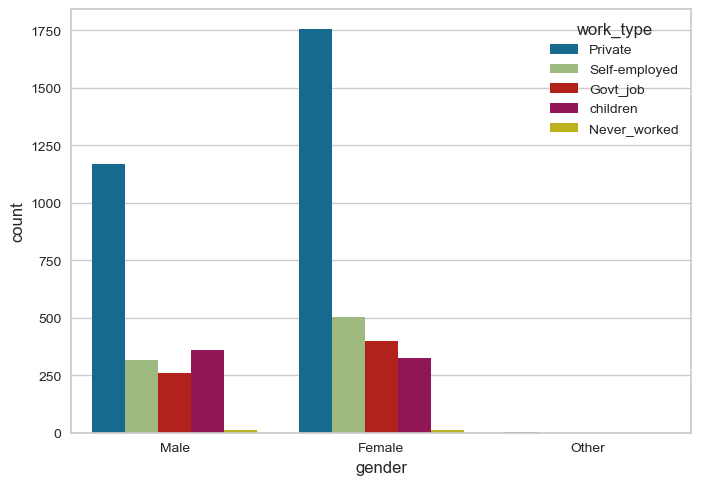

In [11]:
sns.countplot(x="gender",data=df,hue="work_type")

In [12]:
X=df.iloc[:,:10]
Y=df["stroke"]

In [13]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked
...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked


In [14]:
X["gender"]=X["gender"].map({"Male":0,"Female":1,"Other":2})

In [15]:
X["ever_married"]=X["ever_married"].map({"No":0,"Yes":1})

In [16]:
X["work_type"]=X["work_type"].map({"Private":1,"Self-employed":2,"children":3,"Govt_job":4,"Never_worked":0})

In [17]:
X["Residence_type"]=X["Residence_type"].map({"Rural":0,"Urban":1})

In [18]:
X["smoking_status"]=X["smoking_status"].map({"never smoked":1,"formerly smoked":2,"smokes":3,"Unknown":0})

In [19]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,67.0,0,1,1,1,1,228.69,36.600000,2
1,1,61.0,0,0,1,2,0,202.21,28.893237,1
2,0,80.0,0,1,1,1,0,105.92,32.500000,1
3,1,49.0,0,0,1,1,1,171.23,34.400000,3
4,1,79.0,1,0,1,2,0,174.12,24.000000,1
...,...,...,...,...,...,...,...,...,...,...
5105,1,80.0,1,0,1,1,1,83.75,28.893237,1
5106,1,81.0,0,0,1,2,1,125.20,40.000000,1
5107,1,35.0,0,0,1,2,0,82.99,30.600000,1
5108,0,51.0,0,0,1,1,0,166.29,25.600000,2


In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state=2)

In [21]:
X.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64

In [22]:
X_train["gender"].value_counts()

1    2066
0    1511
Name: gender, dtype: int64

In [23]:
# Logistic Regression

In [24]:
trainer_LR=LogisticRegression()

In [25]:
learner_LR=trainer_LR.fit(X_train,Y_train)

In [26]:
yp_LR=learner_LR.predict(X_test)

In [27]:
Lra=accuracy_score(yp_LR,Y_test)*100

#Decision tree

In [28]:
model_DT=DecisionTreeClassifier(random_state=0)

In [29]:
lerner_DT=model_DT.fit(X_train,Y_train)

In [30]:
yp_DT=lerner_DT.predict(X_test)

In [31]:
Dta=accuracy_score(yp_DT,Y_test)*100

In [32]:
#Random forest

In [33]:
model_RF=RandomForestClassifier(random_state=0,n_estimators=20)

In [34]:
learner_RF=model_RF.fit(X_train,Y_train)

In [35]:
yp_RF=learner_RF.predict(X_test)

In [36]:
Rfa=accuracy_score(Y_test,yp_RF)*100

In [37]:
learner_RF.feature_importances_

array([0.03345502, 0.24177162, 0.02948682, 0.0223289 , 0.01676197,
       0.04929429, 0.03243113, 0.28809188, 0.22657395, 0.05980443])

In [38]:
feature_sc=pd.Series(learner_RF.feature_importances_,index=X_train.columns).sort_values(ascending=False)

Text(0, 0.5, 'FEATURE')

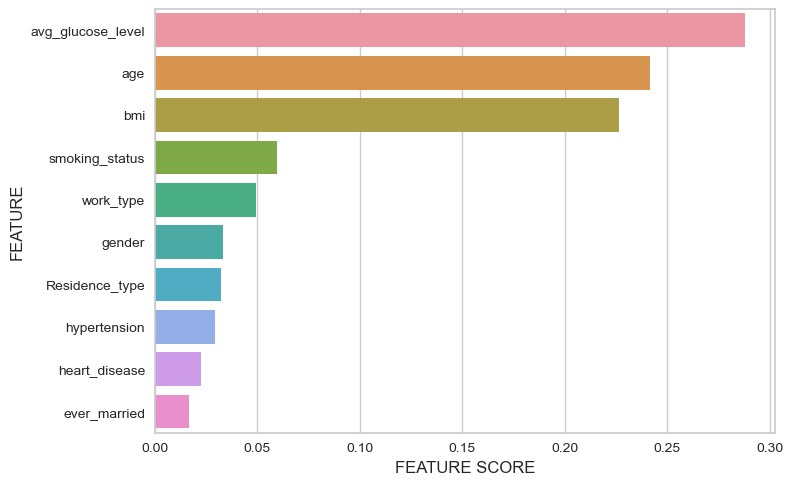

In [39]:
sns.barplot(x=feature_sc,y=feature_sc.index)
plt.xlabel("FEATURE SCORE")
plt.ylabel("FEATURE")

In [40]:
cat_fer=X.columns.tolist()

In [41]:
cat_fer

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status']

In [42]:
experiment=setup(X,target=Y,categorical_features=cat_fer)

,Description,Value
0,Session id,7178
1,Target,stroke
2,Target type,Binary
3,Original data shape,"(5110, 11)"
4,Transformed data shape,"(5110, 18)"
5,Transformed train set shape,"(3577, 18)"
6,Transformed test set shape,"(1533, 18)"
7,Ordinal features,5
8,Categorical features,10
9,Preprocess,True


In [43]:
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9514,0.8483,0.0059,0.1000,0.0111,0.0101,0.0225,0.7150
ridge,Ridge Classifier,0.9514,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0810
dummy,Dummy Classifier,0.9514,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0980
rf,Random Forest Classifier,0.9497,0.8091,0.0000,0.0000,0.0000,-0.0032,-0.0072,0.1840
ada,Ada Boost Classifier,0.9497,0.8295,0.0114,0.1500,0.0211,0.0161,0.0322,0.1400
gbc,Gradient Boosting Classifier,0.9483,0.8442,0.0235,0.1500,0.0405,0.0317,0.0463,0.1680
knn,K Neighbors Classifier,0.9477,0.6900,0.0631,0.3262,0.0994,0.0857,0.1183,0.4260
lda,Linear Discriminant Analysis,0.9458,0.8403,0.0752,0.2779,0.1164,0.0985,0.1219,0.1050
lightgbm,Light Gradient Boosting Machine,0.9455,0.8239,0.0637,0.3405,0.0999,0.0830,0.1174,0.2430
et,Extra Trees Classifier,0.9444,0.7500,0.0343,0.2202,0.0559,0.0403,0.0618,0.1930


In [51]:
def classifi(gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status):
    import numpy as np
    inp=(gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status)
    test=np.asarray(inp)
    test_reshape=test.reshape(1,-1)
    t_pred=learner_LR.predict(test_reshape)
    if t_pred[0]==1:
        return "Stoke"
    else:
        return "No Stoke"

In [47]:
cm=confusion_matrix(Y_test,yp_LR)

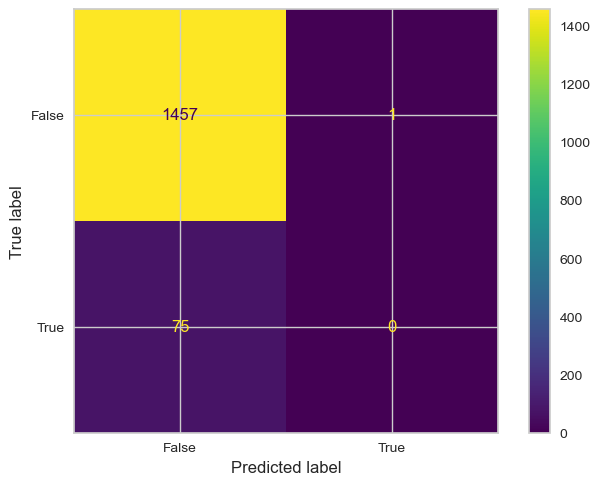

In [48]:
cmm=ConfusionMatrixDisplay(cm,display_labels=[False,True])
cmm.plot()

In [53]:
print(f"Accuracy score for LR:{Lra},Accuracy score for DT:{Dta},Accuracy score for RF:{Rfa},")

Accuracy score for LR:95.04240052185257,Accuracy score for DT:91.8460534898891,Accuracy score for RF:94.97716894977168,


In [52]:
classifi(1,45,1,1,0,3,1,56.3,56,2)

'No Stoke'